In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:

import sys
sys.path.append("..") # Add s higher directory to python modules path.
from data.preprocess import *
datas = loadmat("../data/raw/CD_PD.mat", squeeze_me=True)
data = preprocess(path='../data/raw/CD_PD.mat')

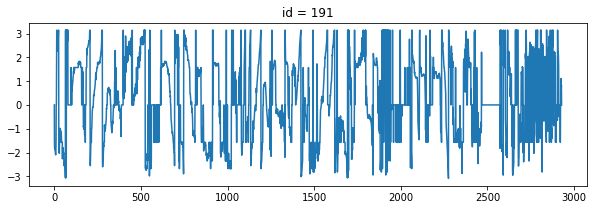

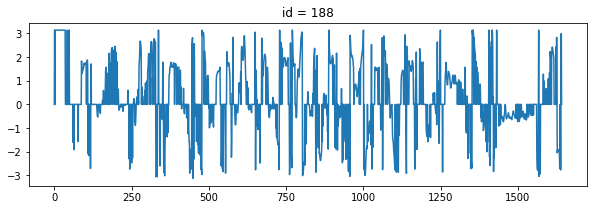

In [28]:
def plot_angle(person):
    X = data['x'][person]
    Y = data['y'][person]
    diffX = [X[i] - X[i-1] for i in range(1, len(X))]
    diffY = [Y[i] - Y[i-1] for i in range(1, len(Y))]
    at = np.arctan2(diffY, diffX)
    plt.figure(figsize=(10,3))
    plt.title('id = %d' % (person, ))
    plt.plot(at)

plot_angle(191)
plot_angle(188)

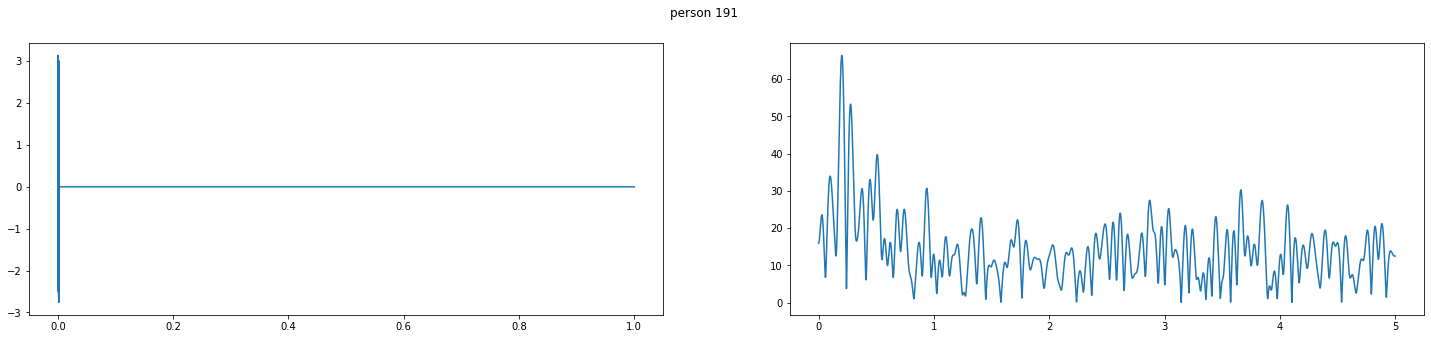

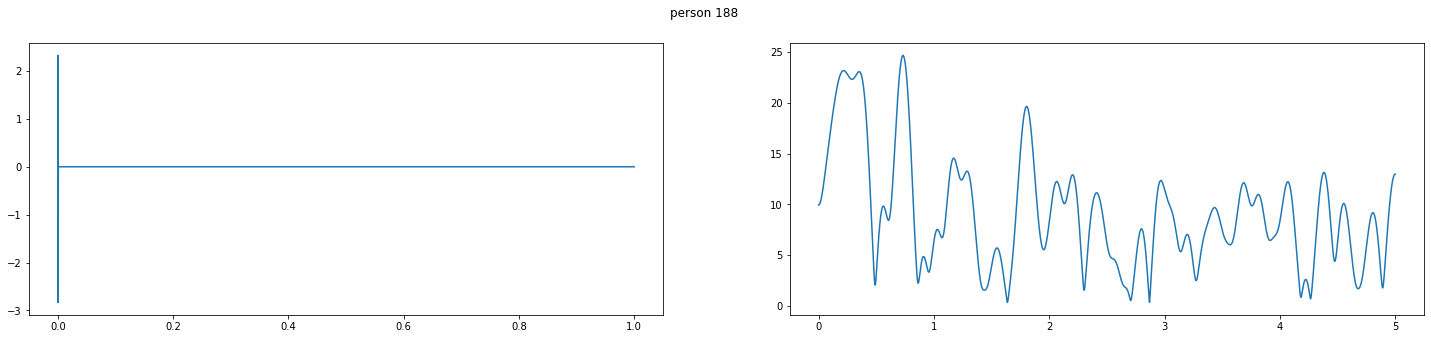

In [67]:
def plot_fft(person):
    X = data['x'][person]
    Y = data['y'][person]
    T = data['t'][person]
    diffX = [X[i] - X[i-1] for i in range(1, len(X))]
    diffY = [Y[i] - Y[i-1] for i in range(1, len(Y))]
    at = np.arctan2(diffY, diffX)

    time = np.linspace(0, 1, 100000)
    
    signal = np.interp(time, T[1:], at)
    fourier = np.fft.rfft(signal)
    n = signal.size
    timestep = 0.1
    freq = np.fft.rfftfreq(n, d=timestep)

    fig, axs = plt.subplots(1, 2, figsize=(25, 5))
    axs[0].plot(time, signal)
    axs[1].plot(freq, np.abs(fourier))
    fig.suptitle('person ' + str(person))
    plt.show()

plot_fft(191)
plot_fft(188)